In [258]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType
from pyecharts import options as opts
from pyecharts.charts import Pie,Bar,Line

%matplotlib inline

In [2]:
df = pd.read_csv("附件.csv",encoding="gbk")#一开始可能要用 gbk 后面重新保存为csv，可以用utf-8了
print("数据总量：%d" % len(df))
df.head()

数据总量：42816


,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
0,0,12,蔬果,1201,蔬菜,120109,其它蔬菜,20150101,201501,DW-1201090311,,生鲜,个,8.0,4.0,2.0,否
1,1,20,粮油,2014,酱菜类,201401,榨菜,20150101,201501,DW-2014010019,60g,一般商品,袋,6.0,3.0,0.5,否
2,2,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020011,150g,一般商品,袋,1.0,2.4,2.4,否
3,3,15,日配,1503,冷藏料理,150305,冷藏面食类,20150101,201501,DW-1503050035,500g,一般商品,袋,1.0,6.5,8.3,否
4,4,15,日配,1505,冷藏乳品,150502,冷藏加味酸乳,20150101,201501,DW-1505020020,100g*8,一般商品,袋,1.0,11.9,11.9,否


In [3]:
# 任务 1.1 对数据作必要的预处理，在报告中列出处理步骤，将处理后的结 果保存为“task1_1.csv”。

In [4]:
# d = df[df['销售数量'].isnull()] # '销售数量'中的缺失项
d = df[df.isnull().values==True] # 所有行中的空值的行
d

,顾客编号,大类编码,大类名称,中类编码,中类名称,小类编码,小类名称,销售日期,销售月份,商品编码,规格型号,商品类型,单位,销售数量,销售金额,商品单价,是否促销
8180,935,21,冲调,2106,蜂蜜/面包酱,210601,蜂蜜,20150121,201501,DW-2106010189,牛魔空版,12g*8,一般,NaN,1.0,9.9,9.9
26902,1978,21,冲调,2106,蜂蜜/面包酱,210601,蜂蜜,20150315,201503,DW-2106010189,牛魔空版,12g*8,一般,NaN,1.0,9.9,9.9


In [5]:
# df.dropna()
# df = df.drop(df[(df['销售数量']<0.001) | (df['销售数量']>100000)].index) #删除数量不符合常识的数据
# df = df[df['销售金额'] == df['销售数量']* df['商品单价']] #销售数量与销售金额之间关系正确的
# print("数据总量：%d" % len(df))
# df.head()
# # r_d.to_csv("task1_1.csv")#保存

In [6]:
# 任务 1.2 统计每个大类商品的销售金额，将结果保存为“task1_2.csv”。

In [7]:
d = df.groupby(['大类名称'],as_index=False)['销售金额'].sum() #as_index不让大类名称作为索引
d

,大类名称,销售金额
0,休闲,74145.20
1,冲调,13957.60
2,家居,6311.10
3,家电,853.90
4,文体,1970.30
5,日配,81958.30
6,水产,2891.00
7,洗化,38013.80
8,烘焙,110.90
9,熟食,5939.94


In [8]:
# 任务 1.3 统计每个中类商品的促销销售金额和非促销销售金额，将结果保 存为“task1_3.csv”。

In [9]:
ture_df = df[df['是否促销'] == '是'] 
false_df = df[df['是否促销'] == '否'] 
## shoe = t[t['中类名称'] == '拖鞋']
ture_df = ture_df.groupby(['中类名称'],as_index = False)['销售金额'].sum()
false_df = false_df.groupby(['中类名称'],as_index = False)['销售金额'].sum()
print("数据总量：%d" % (len(ture_df) + len(false_df)))


数据总量：278


In [10]:
d = pd.merge(ture_df,false_df,on = "中类名称") #拼接俩个对象的图
d

,中类名称,销售金额_x,销售金额_y
0,一次性用品,70.90,727.30
1,乳饮料,673.50,1972.40
2,五谷杂粮,2935.72,9798.35
3,保养用品,77.30,1753.40
4,保温容器,117.90,28.00
...,...,...,...
97,酱菜类,155.40,2271.95
98,鞋类护理用品,12.90,175.20
99,食用油,7950.30,5018.60
100,饼干,2844.42,9823.53


In [11]:
# 任务 1.4 统计生鲜类产品和一般产品的每周销售金额，将结果保存为 “task1_4.csv”。

In [12]:
#销售日期是否连续,并且排除其他类型
date = df.groupby(['商品类型','销售月份','销售日期'],as_index=False)['销售金额'].sum()
date = date[date['商品类型']!= '联营商品' ]
date = date[date['商品类型'] !='12g*8']
date

,商品类型,销售月份,销售日期,销售金额
2,一般商品,201501,20150101,2160.70
3,一般商品,201501,20150102,2650.60
4,一般商品,201501,20150103,1678.91
5,一般商品,201501,20150104,1989.65
6,一般商品,201501,20150105,2305.75
...,...,...,...,...
230,生鲜,201504,20150426,1048.93
231,生鲜,201504,20150427,912.09
232,生鲜,201504,20150428,637.61
233,生鲜,201504,20150429,1749.99


In [13]:
#一般商品类型
normal = date[date['商品类型'] == '一般商品']
normal_goods = []
count = 0 #索引
all_weeks = int(len(normal)/7) + 1 
for weeks in range(1,all_weeks + 1): 
    sum_money = 0
    info = {}
    for j in range(0,7):
        if count < len(normal):
            sum_money = sum_money + normal.iloc[count]['销售金额'] #选取date对象的指定数字的行的某个列的值
            str_type = normal.iloc[count]['商品类型']
            count = count + 1
    info['周数'] = weeks 
    info['商品类型'] = str_type
    info['销售金额'] = sum_money
    normal_goods.append(info)
normal_goods = pd.DataFrame(normal_goods)#生成新的DF对象
normal_goods

,周数,商品类型,销售金额
0,1,一般商品,17369.98
1,2,一般商品,18245.82
2,3,一般商品,18651.03
3,4,一般商品,20430.03
4,5,一般商品,29379.50
5,6,一般商品,29001.47
6,7,一般商品,48351.00
7,8,一般商品,13742.54
8,9,一般商品,12429.54
9,10,一般商品,14562.27


In [14]:
#生鲜商品类型
alive = date[date['商品类型'] == '生鲜']
alive_goods = []
count = 0 #索引
all_weeks = int(len(alive)/7) + 1 
for weeks in range(1,all_weeks + 1): 
    sum_money = 0
    info = {}
    for j in range(0,7):
        if count < len(alive):
            sum_money = sum_money + alive.iloc[count]['销售金额'] #选取date对象的指定数字的行的某个列的值
            str_type = alive.iloc[count]['商品类型']
            count = count + 1
    info['周数'] = weeks 
    info['商品类型'] = str_type
    info['销售金额'] = sum_money
    alive_goods.append(info)
alive_goods = pd.DataFrame(alive_goods)
alive_goods

,周数,商品类型,销售金额
0,1,生鲜,6146.66
1,2,生鲜,6033.68
2,3,生鲜,8393.59
3,4,生鲜,9975.00
4,5,生鲜,4598.95
5,6,生鲜,7231.42
6,7,生鲜,8048.29
7,8,生鲜,3041.81
8,9,生鲜,5257.34
9,10,生鲜,6970.78


In [15]:
d = pd.merge(normal_goods,alive_goods,on = "周数")  #拼接
#d.to_csv("task1_4.csv")
d

,周数,商品类型_x,销售金额_x,商品类型_y,销售金额_y
0,1,一般商品,17369.98,生鲜,6146.66
1,2,一般商品,18245.82,生鲜,6033.68
2,3,一般商品,18651.03,生鲜,8393.59
3,4,一般商品,20430.03,生鲜,9975.00
4,5,一般商品,29379.50,生鲜,4598.95
5,6,一般商品,29001.47,生鲜,7231.42
6,7,一般商品,48351.00,生鲜,8048.29
7,8,一般商品,13742.54,生鲜,3041.81
8,9,一般商品,12429.54,生鲜,5257.34
9,10,一般商品,14562.27,生鲜,6970.78


In [16]:
# 任务 1.5 统计每位顾客每月的消费额及消费天数，将结果保存为“task1_5.csv”，并在报告中列出用户编号为 0-10 的结果。 

In [17]:
person_first = df.groupby(['顾客编号','销售月份','销售日期'],as_index=False)['销售金额'].sum()
person_first.rename(columns={'销售金额':'消费额','销售月份':'月份','销售日期':'日期'},inplace=True)#修改DF对象里的列名,True为真正修改
person_month = person_first.groupby(['顾客编号','月份'],as_index=False)['消费额'].sum()
person_month

,顾客编号,月份,消费额
0,0,201501,11.05
1,0,201504,13.60
2,1,201501,12.30
3,1,201502,30.30
4,2,201501,48.70
...,...,...,...
4471,2607,201504,25.17
4472,2608,201504,59.88
4473,2609,201504,30.80
4474,2610,201504,15.80


In [18]:
dic = { 201501 :'1月', 201502:'2月' , 201503 :'3月' ,201504 :'4月'}
#person_month.replace(dic,inplace = True) #True为确定源数据的修改
pd.set_option('display.max_columns',20)#后者参数设为None显示所有列
pd.set_option('display.max_rows',30)#后者参数设为None显示所有行
person_month = person_month[person_month['顾客编号'] < 11]
person_month

,顾客编号,月份,消费额
0,0,201501,11.05
1,0,201504,13.60
2,1,201501,12.30
3,1,201502,30.30
4,2,201501,48.70
5,2,201502,30.00
6,3,201501,67.39
7,3,201502,360.97
8,3,201503,68.87
9,3,201504,49.28


In [19]:
person_days = person_first.groupby(['顾客编号','月份'],as_index=False)['日期'].count() #对日期次数进行计数
p = person_days[person_days['顾客编号'] < 11]
p

,顾客编号,月份,日期
0,0,201501,1
1,0,201504,1
2,1,201501,1
3,1,201502,1
4,2,201501,2
5,2,201502,1
6,3,201501,3
7,3,201502,4
8,3,201503,7
9,3,201504,4


In [20]:
#任务 2.1 绘制生鲜类商品和一般商品每天销售金额的折线图,并分析比较两类产品的销售状况。

In [254]:
#因为有一天没有卖生鲜，后面画图时无法共用X轴，所以人为添加一个数据
for i in range(len(normal['销售日期'])):
    if list(alive['销售日期'])[i] != list(normal['销售日期'])[i]:
        print(list(normal['销售日期'])[i]) #算出是缺的那一项数据
#         short = list(normal['销售日期'])[i]
        break

alive.loc['235'] = ['生鲜','201502','20150229','700.01']#人为添加一个数据,加在索引为235那行。
new = alive.loc[alive['销售日期'] == '20150229']

# new= {'商品类型': '生鲜',
#         '销售月份': '201502',
#         '销售日期':'20150229',
#         '销售金额': ,
       
#         }
# new_one = pd.DataFrame.from_dict(new,orient='index').T  
# alive = alive.append(new_one) #这是第二种增加数据的方法

alive[['销售月份']] = alive[['销售月份']].astype(int)
alive[['销售日期']] = alive[['销售日期']].astype(int)
#因为加入数据后，alive的各项数据的类型发生变化了，需要用此方法修改
alive[['销售金额']] = alive[['销售金额']].astype(float)
# alive= alive.sort_values(by=['销售日期'],ascending=True)
# alive.dtypes #显示类型
alive['销售金额'] = alive['销售金额'].round(decimals = 2) #保留2位小数,使用后数据变化
alive

20150229


/Users/shanshan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/shanshan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/shanshan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,商品类型,销售月份,销售日期,销售金额
119,生鲜,201501,20150101,676.61
120,生鲜,201501,20150102,870.83
121,生鲜,201501,20150103,669.44
122,生鲜,201501,20150104,574.66
123,生鲜,201501,20150105,835.00
...,...,...,...,...
231,生鲜,201504,20150427,912.09
232,生鲜,201504,20150428,637.61
233,生鲜,201504,20150429,1749.99
234,生鲜,201504,20150430,736.42


In [22]:
normal['销售金额'] = normal['销售金额'].round(decimals = 2) #保留2位小数,使用后数据变化
normal

/Users/shanshan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,商品类型,销售月份,销售日期,销售金额
2,一般商品,201501,20150101,2160.70
3,一般商品,201501,20150102,2650.60
4,一般商品,201501,20150103,1678.91
5,一般商品,201501,20150104,1989.65
6,一般商品,201501,20150105,2305.75
...,...,...,...,...
114,一般商品,201504,20150426,3271.11
115,一般商品,201504,20150427,1626.48
116,一般商品,201504,20150428,1982.43
117,一般商品,201504,20150429,4152.75


In [265]:
rn = normal['销售日期']#横坐标的内容
x = np.arange(len(rn))
xticks0 = list(rn)
y0 = normal['销售金额']
y1 = alive['销售金额']

# 折线图
#-----------------------画图-------------------------------
c = (     #如果图表不显示数据得刷新一下
    Line(init_opts=opts.InitOpts(width="1600px", height="800px",bg_color = 'white')) #背景颜色
    .add_xaxis(xticks0)
    .add_yaxis("一般商品",w0,label_opts=opts.LabelOpts(is_show=False))#点不显示数据
    .add_yaxis("生鲜", w1,label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts = opts.TitleOpts(title = "一般商品和生鲜的每日销售额基本示例"),
                     toolbox_opts = opts.ToolboxOpts(is_show=True), #工具箱
                     xaxis_opts = opts.AxisOpts(axislabel_opts = opts.LabelOpts(rotate=80)),   #旋转角度  
                    )
#     .render("line_base0.html")
                    
    )
c.render_notebook()

In [25]:
#   任务 2.2 按月绘制各大类商品销售金额的占比饼图，并分析其销售状况。

In [266]:
month = []
df['销售金额'] = df['销售金额'].round(decimals = 1)
for i in range(0, 4):
    month.append(df[df["销售月份"] == (201501 + i)])

sum_money = [] #销售金额
data = []

for i in range(0, 4):
    sum_money.append(
        pd.pivot_table(data = month[i], index=["大类名称"], values=["销售金额"], fill_value=0, aggfunc=[np.sum, len]))
    data.append(pd.DataFrame({"大类名称": sum_money[i].index, "月销售总额": sum_money[i].iloc[:, 0]}))

labels = []
sizes = []

#画图部分
#-----------------------画图-------------------------------
for i in range(0, 4):   
    labels.append(list(data[i]["大类名称"]))
    sizes.append(list(data[i]["月销售总额"]))
    size_list = [round(sizes[i][j],1)for j in range(len(sizes[i]))] #保留1位小数  
    c = (
        Pie(init_opts=opts.InitOpts(width="1500px", height="600px",bg_color = 'white'))
        .add(
            series_name="大类销售情况",
            data_pair=[list(z) for z in zip(labels[i], size_list)], #将两类元素分别压入新列表
            radius=["50%", "70%"],
            label_opts=opts.LabelOpts(is_show = True, position="center"),
        )
        .set_global_opts(  toolbox_opts = opts.ToolboxOpts(is_show = True),#工具箱
                           legend_opts = opts.LegendOpts(pos_left = "legft", orient="vertical"))
        .set_series_opts(
            tooltip_opts=opts.TooltipOpts(
                trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
            ),
            label_opts=opts.LabelOpts(formatter="{b}: {d}%") #a:为series_name b为大类具体名称，c为数据，d为比列
        )
        .render("pie{0}.html".format(i))
    )
#     c.render_notebook()# 显示
    

In [27]:
#任务 2.3 绘制促销商品和非促销商品销售金额的周环比增长率柱状图。（环比增长率，一般是指和上期相比较的增长率。
#环比增长率=(本期的某个指标的值-上一期这个指标的值)/上一期这个指标的值*100%。）

In [28]:
data_csv = df.groupby(['销售月份','销售日期','是否促销'],as_index=False)['销售金额'].sum()
day = set(data_csv['销售日期'])
yes = []
weeks = 0
count = 0
for i in range(int(len(day)/7)+1): 
    sum_money = 0
    info = {}
    for j in range(7):
        if count < len(day):
            str_type = data_csv.iloc[count]['是否促销']
            if str_type=='是':
                sum_money = sum_money + data_csv.iloc[count]['销售金额']
            count += 1
    weeks += 1
    info['周数'] = weeks
    info['是否促销'] = '是'
    info['销售金额'] = sum_money
    yes.append(info)

df_yes = pd.DataFrame(yes)
df_yes

,周数,是否促销,销售金额
0,1,是,1396.7
1,2,是,2921.9
2,3,是,1518.6
3,4,是,3578.8
4,5,是,1558.1
5,6,是,2038.9
6,7,是,3883.6
7,8,是,2358.4
8,9,是,4223.7
9,10,是,5502.3


In [200]:
data_csv = df.groupby(['销售月份','销售日期','是否促销'],as_index=False)['销售金额'].sum()
day = set(data_csv['销售日期'])
no = []
weeks = 0
count = 0
for i in range(int(len(day)/7)+1): 
    sum_money = 0
    info = {}
    for j in range(7):
        if count < len(day):
            str_type = data_csv.iloc[count]['是否促销']
            if str_type == '否':
                sum_money = sum_money + data_csv.iloc[count]['销售金额']
            count += 1
    weeks += 1
    info['周数'] = weeks
    info['是否促销'] = '否'
    info['销售金额'] = sum_money
    no.append(info)

df_no = pd.DataFrame(no)
df_no

,周数,是否促销,销售金额
0,1,否,9792.2
1,2,否,9986.0
2,3,否,11112.4
3,4,否,8389.4
4,5,否,10980.7
5,6,否,11559.3
6,7,否,9118.9
7,8,否,14951.0
8,9,否,7695.3
9,10,否,18523.3


In [267]:
#数据导入前的处理
df_yes_data = round(df_yes['销售金额'].pct_change(),3)#pct_change()方法计算当前元素与先前元素之间的百分比变化
df_no_data = round(df_no['销售金额'].pct_change(),3)#保留3位小数
df_yes_data[0] = 0
df_no_data[0] = 0

rn = df_yes['周数']#横坐标的内容
vbar0 = round(df_yes['销售金额'],2)#   2014的条形图的y轴数据,在图上显示时均保留两位
vbar1 = round(df_no['销售金额'],2)#   2015的条形图的y轴数据
x = np.arange(len(rn))
v0 = np.array(list(vbar0))
v1 = np.array(list(vbar1))
l0 = np.array(df_yes_data)
l1 = np.array(df_no_data)
xticks1 = list(rn)
l0 = 100*l0
l1 = 100*l1 #方便后面绘图，所以给乘以100
v0 = list(v0)
v1 = list(v1) #有时候np类的数据无法显示，要转换为列表形式的数据才可以

#-----------------------画图-------------------------------
#双柱状加折线图
bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px",bg_color = 'white'))
    .add_xaxis(xticks1)
    .add_yaxis(
        series_name="促销商品",
        yaxis_data=v0,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="非促销商品",
        yaxis_data=v1,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="周环比增长率",
            type_="value",
            min_= -500,
            max_= 150,
            interval = 50,
            axislabel_opts=opts.LabelOpts(formatter= "{value} %"),
        )
    )
    .set_global_opts(
        toolbox_opts = opts.ToolboxOpts(is_show = True),#工具箱
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross",
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
        ),
        yaxis_opts=opts.AxisOpts(
            name="销售金额",
            type_="value",
            min_= 0,
            max_= 25000,
            interval = 5000,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
)
line = (
    Line()
    .add_xaxis(xticks1)
    .add_yaxis(series_name="促销商品周环比增长",
        yaxis_index=1,
        y_axis=l0,
        label_opts=opts.LabelOpts(is_show=False),) #是否在图中显示点的数据
    .add_yaxis(
        series_name="非促销商品周环比增长",
        yaxis_index=1,
        y_axis=l1,
        label_opts=opts.LabelOpts(is_show=False),
    )
)
# bar.overlap(line).render("mixed_bar_and_line.html")
bar.overlap(line).render_notebook()


In [ ]:
# 任务 3.1 根据消费情况，分别为累计消费前 10 的顾客画像。

          消费总额  消费数量
小类名称                
其它水果      12.5     1
功能盐        2.3     1
叶菜        12.4     5
名酒      8880.0     2
国产省外香烟  4200.0     1
女毛裤       30.0     1
女羽绒服      44.9     1
成人牙膏       3.9     1
新鲜蛋品      27.4     3
无芯纸       12.9     1
玉米油       85.9     1
瓜类         2.9     1
笋类         4.0     2
米制点心       6.1     1
花果        12.2     1
花生油      155.0     1
蕉类         7.6     1
藕/葛藤粉     25.7     1
调和油       49.9     1
豆干豆皮       2.2     1
鲜猪肉       18.0     1
鲜调味        1.2     1
         消费总额  消费数量
小类名称               
一次性垃圾袋    7.0     1
中式糕点     56.6     6
其他即食熟制品  10.6     2
其他液体调料    3.9     1
其他炒货     11.8     1
...       ...   ...
锅刷        5.0     1
预调酒      13.0     2
餐具清洁剂    15.9     1
香辛粉      15.4     2
麦片/粉     25.5     1

[118 rows x 2 columns]
          消费总额  消费数量
小类名称                
一次性垃圾袋    14.0     2
其他煮食面/粉    1.7     1
其他糕点      20.8     2
其他饼干      16.9     1
冰糖         9.5     1
...        ...   ...
趣味/休闲      9.2     2
软抽纸巾      39.6     2
辣酱

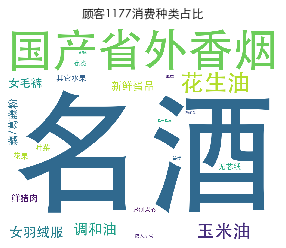

KeyboardInterrupt: 

In [101]:
consume_top = pd.pivot_table(data = df,index=["顾客编号"],values=["销售金额"],fill_value=0,aggfunc=[np.sum,len])
#列出每名顾客的消费总金额与消费次数
content = pd.DataFrame({"消费总额":consume_top.iloc[:,0]}) #将销售金额切片列出，改为消费总额
consume_sort = content.sort_values(by="消费总额",ascending = False) #降序排列
consume_top10 = consume_sort.head(10)
head_top10 = list(consume_top10.index) # #获取前10编号
person_top10=[]
#获取这些顾客的消费信息
for i in range(0,len(head_top10)):
    person_top10.append(df[df["顾客编号"] == head_top10[i]])

object_top10 = []
object_list = []

for i in range(0,len(head_top10)):
    object_top10 . append(pd.pivot_table(data = person_top10[i],index=["小类名称"],values=["销售金额"],fill_value=0,aggfunc=[np.sum,len]))
    object_list .append(pd.DataFrame({"消费总额":object_top10 [ i].iloc[:,0],"消费数量":object_top10 [ i].iloc[:,1]}))
    print(object_list [i])
    
#-----------------------画图-------------------------------
#画出按照顾客购买物比列的词图
plt.rcParams['font.sans-serif'] = ['STHeiti'] #用来正常显示中文标签
font  =  r'/System/Library/AssetsV2/com_apple_MobileAsset_Font6/bf625d290b705582d5fd619878281f3325b075d0.asset/AssetData/STHEITI.ttf'
wc  =  WordCloud(font_path  = font, #如果是中文必须要添加这个，否则会显示成框框
                background_color  =  'white',
                max_words  =  200, # 最多显示词数
                max_font_size  =  500, # 字体最大值
                width = 1000,
                height = 800,
                )
for i in range(0,len(head_top10)):#词云图
        wc.generate_from_frequencies(object_list[i]["消费总额"])
        plt.title("顾客" + str(head_top10[i]) + "消费种类占比")
        plt.imshow(wc)  #用plt显示图片
        plt.axis('off') #不显示坐标轴
#         plt.savefig("{0}顾客消费种类占比.png".format(head_top10[i]),format='png',dpi = 300)#保存图片,dpi为图片大小参数
        plt.show()

In [ ]:
# 任务 3.2 分析各大类商品的销售情况，总结其销售规律

In [270]:
# df  =  pd.DataFrame(df)
print(df.columns)
data_csv_bigclass  =  df['大类名称']
print(data_csv_bigclass)
# 通过集合去重获取大类的名称
big_class_set  =  list(set(data_csv_bigclass))

# 循环分类 总表分割获取各个大类独自对应的内容
save_class  =  []
for i in range(0, len(big_class_set)):
    save_class.append(df[df['大类名称']  ==  big_class_set[i]])
data_all_list  =  []
merge_data  =  []

# 计算各个大类的每日总销售额
for i in range(0, len(big_class_set)):  # values = ['销售金额']可以获得当日销售总额
    data_all_list.append(
        pd.pivot_table(data = save_class[i], index = ['销售日期'], values = ['销售数量'], fill_value = 0, aggfunc = [np.sum, len]))
# print(data_all_list)

# -----------------------画图-------------------------------
for i in range(0, 1):
    # 日期用sort_value()排序
    count_list = []
    for j in range(0,len(data_all_list[i].index.sort_values())):
        count = data_all_list[i].index.sort_values()[j] # max == 115
        count = str(count)
        count = count[-3:]
        count_list.append(count)#将日期切片为更小的数字，方便在坐标轴上呈现。
        #面积折线图
    c = (
        Line(init_opts=opts.InitOpts(width="1000px", height="500px",bg_color = 'white'))
        .add_xaxis(count_list)
        .add_yaxis('{0}的每日销售数量'.format(big_class_set[i]), data_all_list[i].iloc[:, 0], is_smooth=True) #光滑与否
        .set_series_opts(
            areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
            label_opts=opts.LabelOpts(is_show=False),
        )
        .set_global_opts(
            toolbox_opts = opts.ToolboxOpts(is_show = True),#工具箱
            title_opts=opts.TitleOpts(title = '{0}的每日销售数量'.format(big_class_set[i])),
            xaxis_opts=opts.AxisOpts(  
                axislabel_opts=opts.LabelOpts(rotate=80) ,#旋转角度
                axistick_opts=opts.AxisTickOpts(is_align_with_label=True),
                is_scale=False,
                boundary_gap=False,
            ),
        )
        .render('{0}的task_3.2.html'.format(big_class_set[i])) #在循环之中，似乎不能在jupyter里展示
#         .render_notebook()
    )
    
    

Index(['顾客编号', '大类编码', '大类名称', '中类编码', '中类名称', '小类编码', '小类名称', '销售日期', '销售月份',
       '商品编码', '规格型号', '商品类型', '单位', '销售数量', '销售金额', '商品单价', '是否促销'],
      dtype='object')
0        蔬果
1        粮油
2        日配
3        日配
4        日配
         ..
42811    蔬果
42812    蔬果
42813    洗化
42814    蔬果
42815    酒饮
Name: 大类名称, Length: 42816, dtype: object


In [ ]:
# 任务 3.3 分析促销对商品销售的影响，为超市制定销售策略提供建议。

In [271]:
sale_big_type  =  df[df["是否促销"]  ==  "是"]
sale  =  pd.pivot_table(data = sale_big_type, index = ["大类名称"], values = ["销售金额"], fill_value = 0, aggfunc = [np.sum, len])
sale_name  =  list(sale.index)
print(sale_name)

sale_yes  =  []
sale_no  =  []
yes_money  =  []
no_money  =  []
for i in range(0, len(sale_name)):
    sale_yes.append(df[(df["大类名称"]  ==  sale_name[i]) & (df["是否促销"]  ==  "是")])
    riqi1  =  len(sale_yes[i]["销售日期"].to_list())
    yes_money.append(sale_yes[i]["销售金额"].sum() / riqi1)

    sale_no.append(df[(df["大类名称"]  ==  sale_name[i]) & (df["是否促销"]  ==  "否")])
    riqi2  =  len(sale_no[i]["销售日期"].to_list())
    no_money.append(sale_no[i]["销售金额"].sum() / riqi2)

print(yes_money)
print('\n')
print(no_money)

# -----------------------画图-------------------------------
list0 = []
list1 = []
for i in range(0,len(sale_name)):
    dic0 = {'value':yes_money[i],'percent':round(yes_money[i]/(yes_money[i]+no_money[i]),4)}
    dic1 = {'value':no_money[i],'percent':round(no_money[i]/(yes_money[i]+no_money[i]),4)}
    list0.append(dic0)
    list1.append(dic1)
    
c = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="500px",bg_color = 'white'))
    .add_xaxis(sale_name)
    .add_yaxis("促销日均销售金额", list0, stack="stack1", category_gap="50%")
    .add_yaxis("非促销日均销售金额", list1, stack="stack1", category_gap="50%")
    .set_global_opts(  toolbox_opts = opts.ToolboxOpts(is_show = True),#工具箱
                       legend_opts = opts.LegendOpts(pos_left = "legft", orient="vertical"))
    .set_series_opts(
        label_opts=opts.LabelOpts(
            position="right",
            formatter=JsCode(
                "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
            ),
        )
    )
#     .render("task_3.3.html")
)
c.render_notebook()

['休闲', '冲调', '家居', '家电', '文体', '日配', '洗化', '粮油', '酒饮', '针织']
[9.507350352112676, 26.523270440251565, 9.236904761904762, 22.45, 9.946666666666667, 23.36687306501548, 12.23255620316403, 20.24622516556291, 39.23987138263666, 20.635227272727274]


[7.988915919112058, 22.542592592592595, 10.917554240631166, 16.854166666666668, 7.226587301587301, 13.971311216429699, 12.49196572040707, 8.917073647196718, 26.750816582914574, 18.202764976958527]
